Stable diffusion is based on 2 special types of layers:

Convolutional layer

<h1>Why not a fully connected layer?<h1>

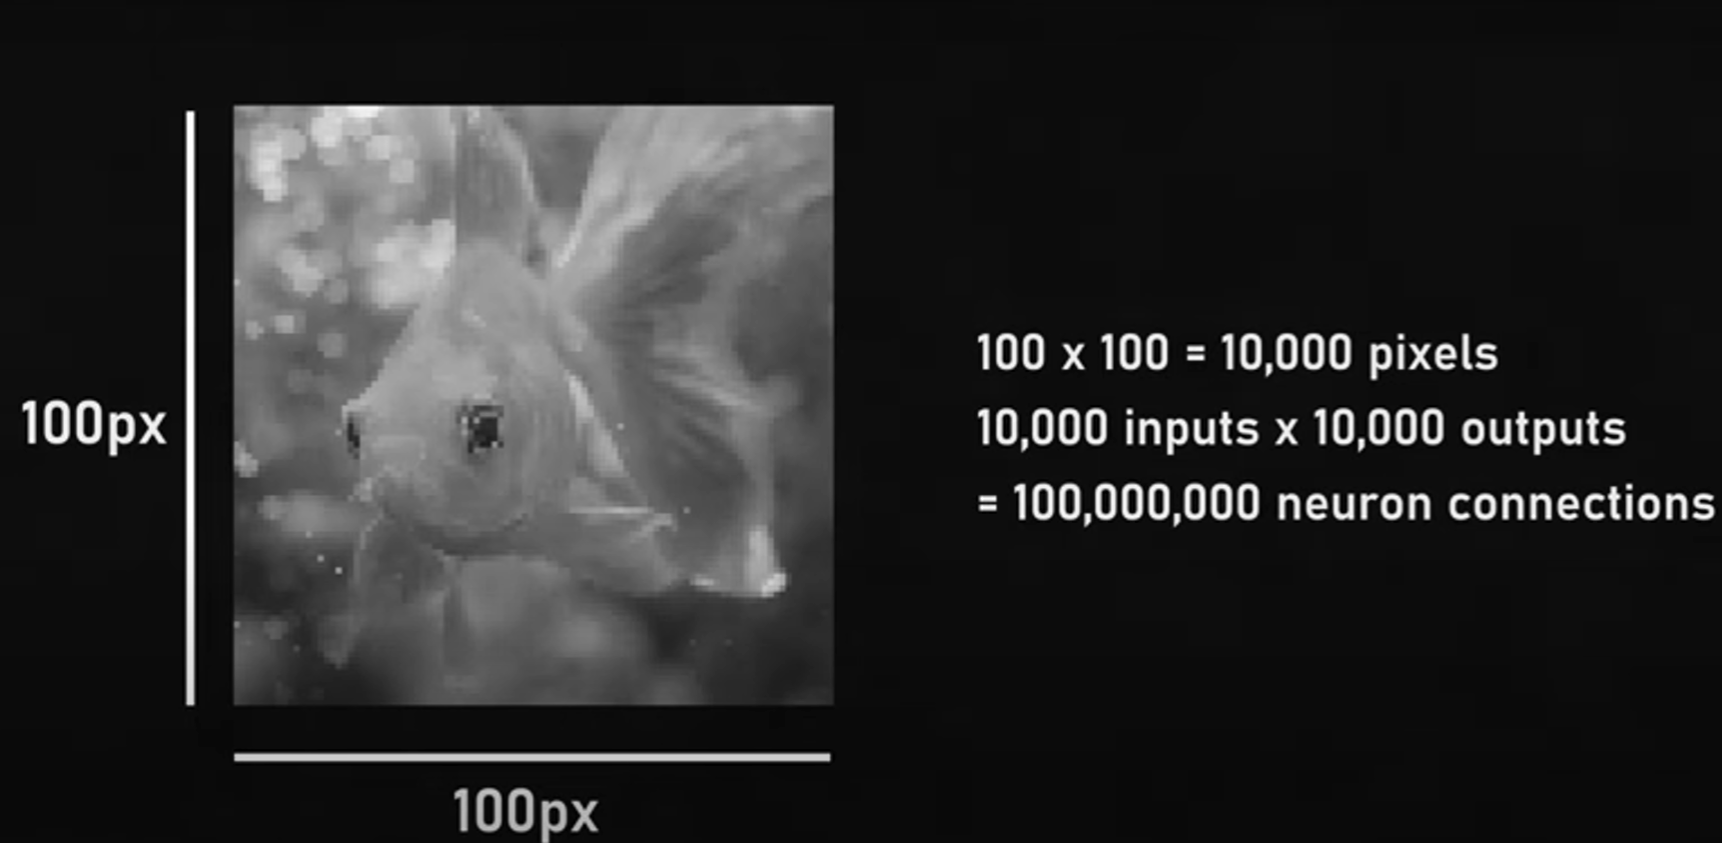


<h3>We typically avoid using fully connected layers for image generation and processing because they have several limitations compared to convolutional layers:

High Computational Cost: Fully connected layers require every input pixel to connect to every output pixel, which becomes computationally expensive for large images. For instance, an image with 
256
×
256
256×256 pixels would require millions of parameters, leading to inefficiency and a greater risk of overfitting.

Loss of Spatial Structure: Fully connected layers treat all input features equally, disregarding the spatial relationships between neighboring pixels. Images have a natural 2D structure (e.g., nearby pixels are often related), and fully connected layers fail to preserve this structure.

Scalability Issues: As the resolution of the input image increases, the number of parameters in a fully connected layer grows exponentially. Convolutional layers, by using shared weights and local receptive fields, scale much better with image size. <h3>

<h3>Why are fully connected layers unsuitable for processing images?(multiple answers)


A- Fully connected layers can't use colors.

B- Fully connected layers can't capture relationships between neighboring pixels.

C- Fully connected layers treat all pixels equally, ignoring spatial structure.

D- Fully connected layers are not computationally expensive for high-resolution images.
<h3>

<h3>Convolutional Layer
In convolutional layers, each output pixel is calculated based on a grid of its surrounding input pixels using a 2D filter (also called a kernel). The filter slides across the input image, applying mathematical operations to extract meaningful features.


The output pixel is determined by:

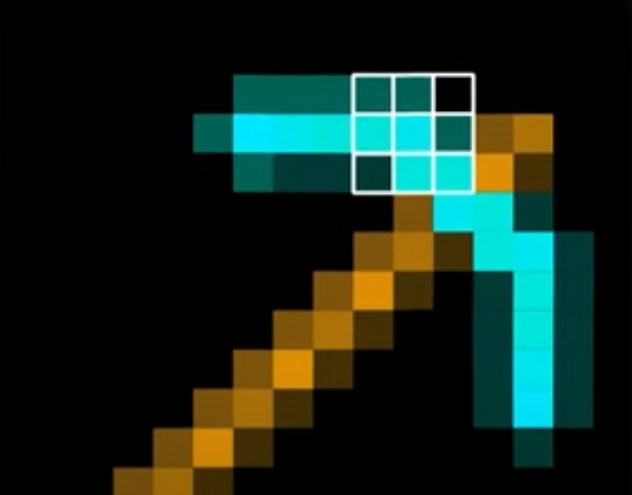

Multiplying each surrounding input pixel by the corresponding value in the filter (kernel).
Summing up all these products to compute the result for that pixel.
This process captures specific patterns in the image, such as edges or textures.

Example Filters
Vertical Edge Detector
This filter highlights vertical edges in an image:
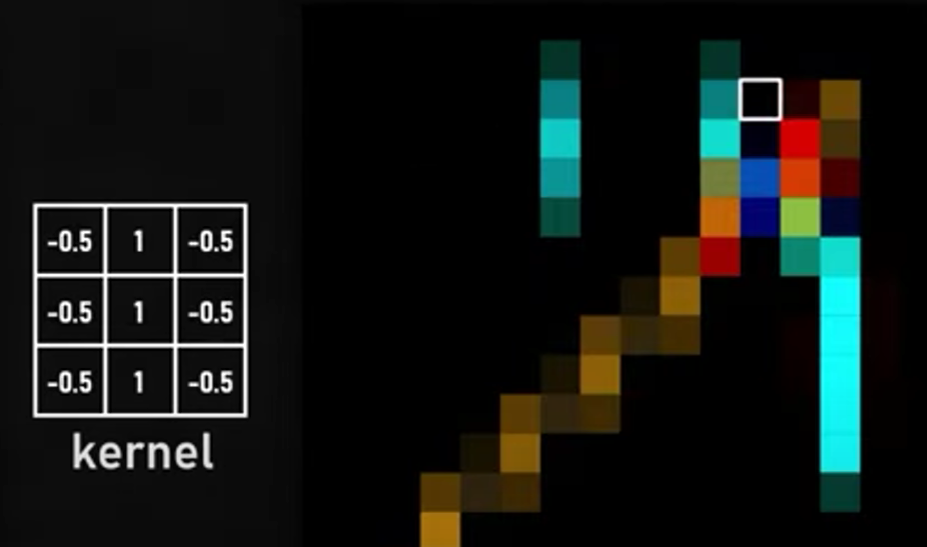


Horizontal Edge Detector
This filter is designed to emphasize horizontal edges:
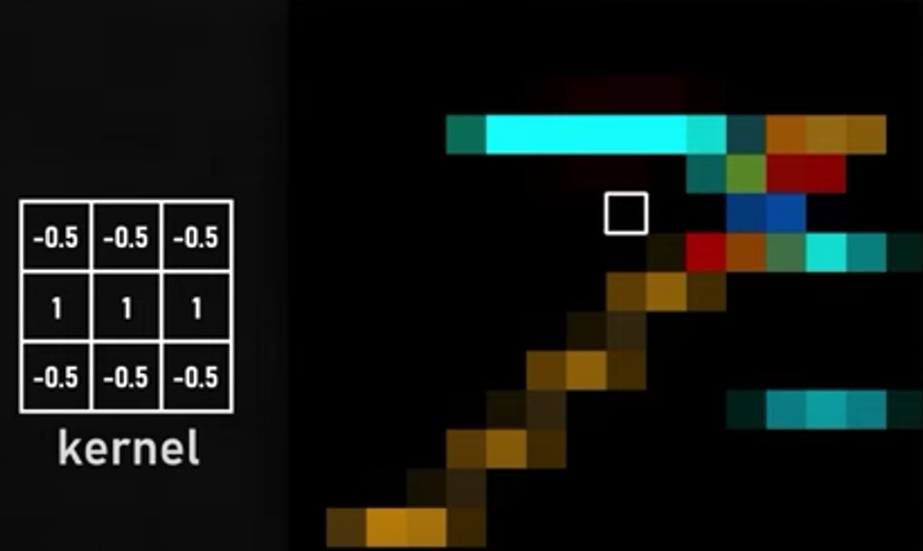


Efficient Parameterization
For a filter (kernel) size of 5x5, the number of parameters is just 25 for a 100x100 image, making convolutional layers computationally efficient.

each output pixel is determined by a grid of all the surrounding input pixels, for this we use a 2D grid the filter (kernel).
<h3>



# Computer Vision: Identifying What's in an Image  

## Level 1: Image Classification  
The network labels **what is in an image**.  

---

## Level 2: Image Classification + Localization  
The network labels the image and adds a **bounding box** to indicate the location of the identified object.  
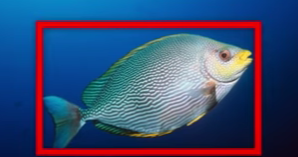  

---

## Level 3: Object Detection  
The system can now identify and localize **multiple objects** within the same image.  
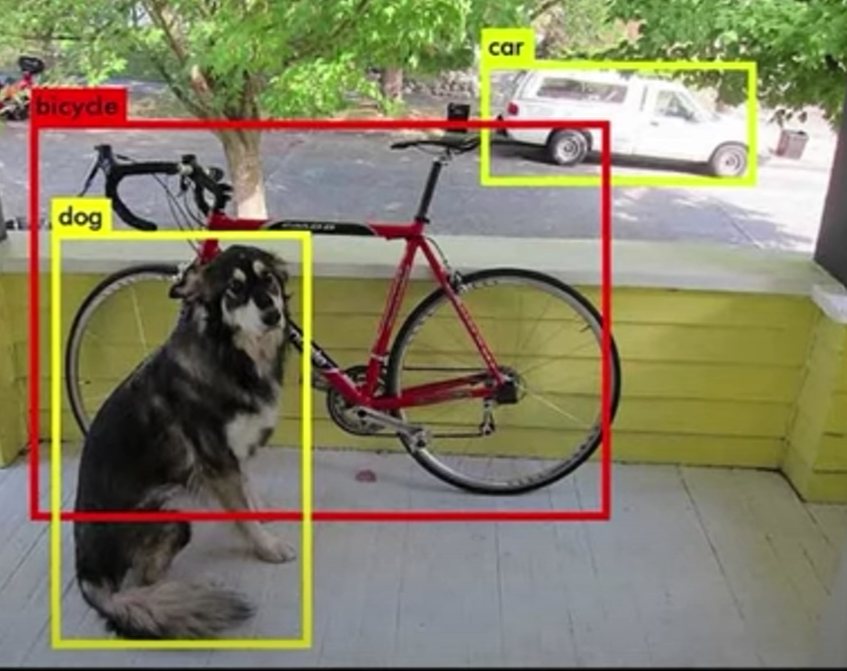  

---

## Level 4: Semantic Segmentation  
Every pixel in the image is labeled with **what it represents**.  
This method is often used for tasks like **background removal**.  
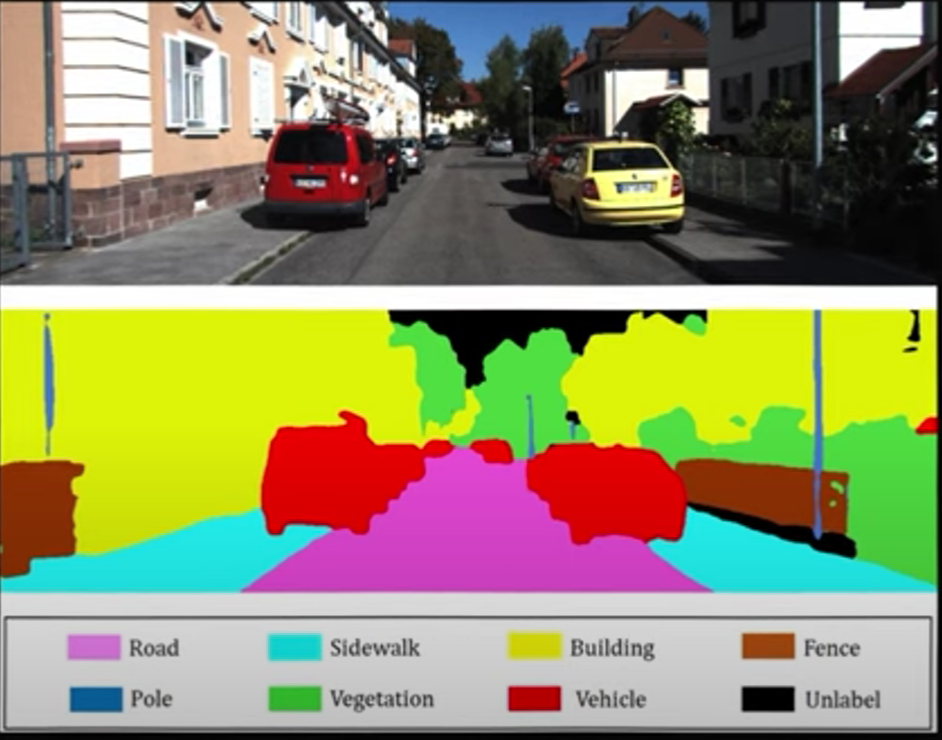  

---

## Level 5: Instance Segmentation  
The system not only identifies objects but also distinguishes between **multiple instances** of the same object.  
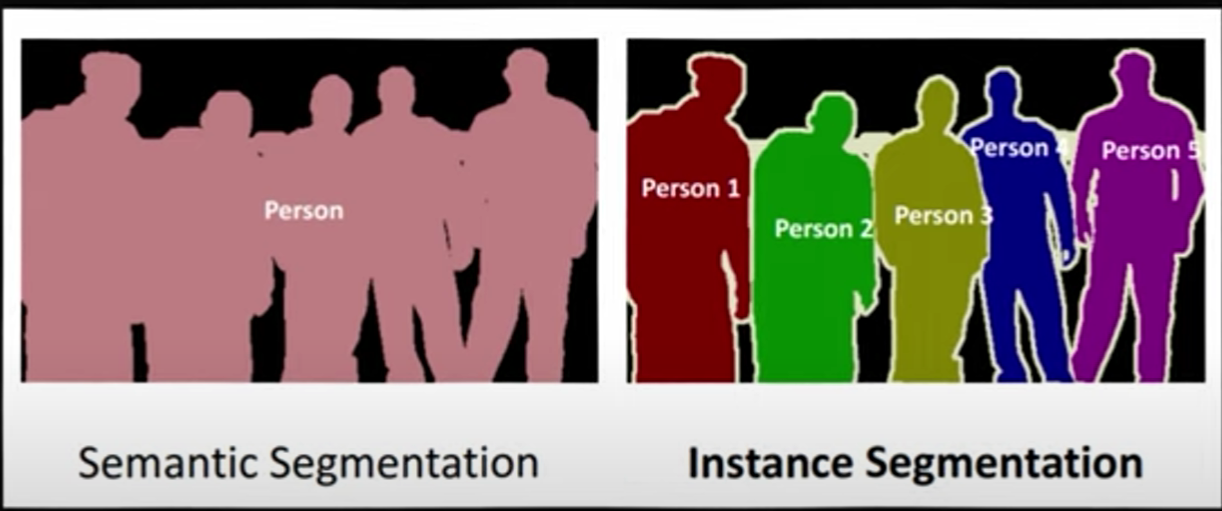  


# Reducing Data to Speed Up Processing  

To speed up image processing and reduce storage requirements, we often compress data. This involves techniques that balance size reduction with maintaining as much quality as possible.  

---

## Using File Formats  
Instead of storing raw images, we use compressed file formats like **JPEG**, which can significantly reduce the size of the data. However, this compression comes at the cost of slightly reduced image quality.  

---

## Autoencoders for Data Compression  

### How Autoencoders Work  
An **autoencoder** is a neural network trained to:  
1. **Encode** data into a compact representation in a **latent space**.  
2. **Decode** the compact representation to reconstruct the original data as closely as possible.  

### Example: Compression Results  
- **Original Image Size:** 3 × 512 × 512 = 786,432  
- **Compressed Representation:** 4 × 64 × 64 = 16,384  
- **Compression Ratio:** Compressed size is just 2% of the original.  

---

## Latent Diffusion Model  

Instead of directly adding noise to images in their pixel space and then denoising them, a **latent diffusion model** encodes the images into a **latent space** first.  

### Workflow:  
1. **Encode** the image into latent space.  
2. Apply **noise/denoise** operations in the latent space.  
3. **Decode** back into the image space.  

### Why It’s Faster:  
Operations in the latent space are computationally much more efficient, making latent diffusion models significantly faster than traditional methods.  

---

![Latent Diffusion Model](attachment:image.png)  


# U-net

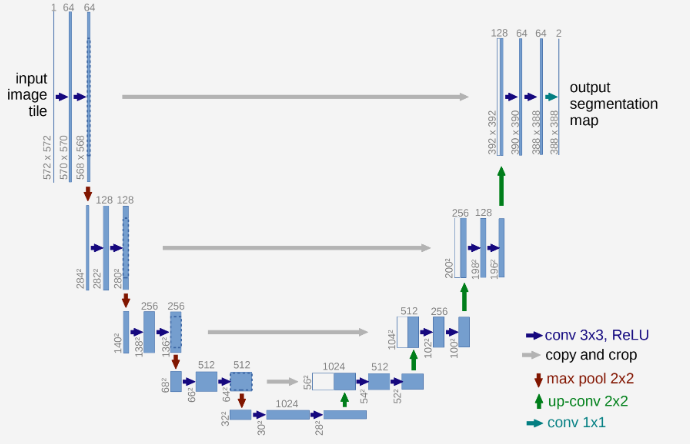


U-net is a convolutional neural network architecture that was developed to segment images using a convolutional neural network.
It looks a little bit like a U when the architecture is visually represented.

The building blocks of the U-net architecture are the following:

1. convolutional layers extract all features from the input images at different scales.
2. An encoder that zooms out the image, doubling the number of features each downsampling step and allows U-net to find more complex features each step. At each step information is sent to the decoder using skip connections.
it consists of:
    Two 3×3 convolutions followed by ReLU activations.
    A 2×2 max pooling operation with a stride of 2 for downsampling.

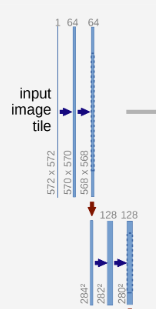

3. Skip Connections copy the details from the encoder to the decoder, to preserve them and make sure they are not lost.
4. A decoder zooms in to the image, reconstructing it and 
it consists of:
    A 2×2 convolution that 

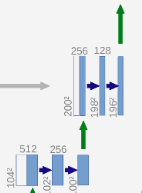

5. Bottleneck, exists in the lowest layer of the network, connecting both the encoder and decoder.
it consists of: 
    two 3×3 convolutions

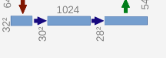

6. The Output layer generates the last image or prediction. This layer consists of a single convolutional layer,to reduce the feature maps, and followed by a single activation function.

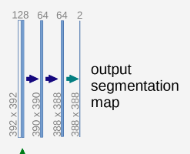

legend:

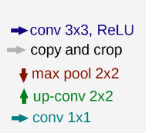

# How does U-net fit into stable diffusion?

Stable Diffusion generates images by progressively refining random noise into a coherent image through a process called denoising diffusion probabilistic modeling, so we utilise U-net to predict what noise to generate and what noise we gradually clean out.



After the tokenization and text encoding phase, U-net is used to choose what noise gets cleaned out or added. This happens in multiple steps, and the image is improved gradually until the predetermined amount of timesteps have been passed trough.

![alt text](irr.gif)